In [1]:
import itertools
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

In [2]:
!conda install -c anaconda xlrd --yes

Solving environment: ...working... done

# All requested packages already installed.



In [99]:
df = pd.read_excel(r'C:\Users\OLUFUNMILAYO\Downloads\fy2017_table4.xlsx')

print('Data downloaded and read into a dataframe!')

Data downloaded and read into a dataframe!


In [100]:
df.head()

,State or territory of residence,2010,2011,2012,2013,2014,2015,2016,2017
0,Alabama,3740,4063,3873,3848,3685.0,3928.0,4736.0,3801.0
1,Alaska,1703,1799,1612,1460,1505.0,1572.0,1726.0,1547.0
2,Arizona,18243,20333,18434,16097,16908.0,17997.0,20694.0,19344.0
3,Arkansas,2684,2874,2795,2900,2793.0,2814.0,3158.0,3071.0
4,California,208446,210591,196622,191806,198379.0,209568.0,223141.0,214243.0


In [101]:
df.dtypes

State or territory of residence     object
2010                                object
2011                                object
2012                                object
2013                                object
2014                               float64
2015                               float64
2016                               float64
2017                               float64
dtype: object

In [102]:
df.columns = list(map(str, df.columns))

In [103]:
# let's rename the columns so that they make sense
df.rename(columns={'State or territory of residence':'Residence'}, inplace=True)

In [104]:
df.head()

,Residence,2010,2011,2012,2013,2014,2015,2016,2017
0,Alabama,3740,4063,3873,3848,3685.0,3928.0,4736.0,3801.0
1,Alaska,1703,1799,1612,1460,1505.0,1572.0,1726.0,1547.0
2,Arizona,18243,20333,18434,16097,16908.0,17997.0,20694.0,19344.0
3,Arkansas,2684,2874,2795,2900,2793.0,2814.0,3158.0,3071.0
4,California,208446,210591,196622,191806,198379.0,209568.0,223141.0,214243.0


In [105]:
df.columns = list(map(str, df.columns))

In [110]:
df['2010'] = pd.to_numeric(df['2010'], errors='coerce')

In [106]:
df['2011'] = pd.to_numeric(df['2011'], errors='coerce')

In [107]:
df['2012'] = pd.to_numeric(df['2012'], errors='coerce')

In [108]:
df['2013'] = pd.to_numeric(df['2013'], errors='coerce')

In [111]:
df.dtypes

Residence     object
2010         float64
2011         float64
2012         float64
2013         float64
2014         float64
2015         float64
2016         float64
2017         float64
dtype: object

In [112]:
df.set_index('Residence', inplace=True)


In [113]:
df['Total'] = df.sum(axis=1)

In [114]:
years = list(map(str, range(2010, 2017)))
df.shape

(58, 9)

In [115]:
df.head()

,2010,2011,2012,2013,2014,2015,2016,2017,Total
Residence,,,,,,,,,
Alabama,3740.0,4063.0,3873.0,3848.0,3685.0,3928.0,4736.0,3801.0,31674.0
Alaska,1703.0,1799.0,1612.0,1460.0,1505.0,1572.0,1726.0,1547.0,12924.0
Arizona,18243.0,20333.0,18434.0,16097.0,16908.0,17997.0,20694.0,19344.0,148050.0
Arkansas,2684.0,2874.0,2795.0,2900.0,2793.0,2814.0,3158.0,3071.0,23089.0
California,208446.0,210591.0,196622.0,191806.0,198379.0,209568.0,223141.0,214243.0,1652796.0


In [116]:
df.sort_values(['Total'], ascending=False, axis=0, inplace=True)

In [117]:
df_top5 = df.head()

In [118]:
df_top5

,2010,2011,2012,2013,2014,2015,2016,2017,Total
Residence,,,,,,,,,
California,208446.0,210591.0,196622.0,191806.0,198379.0,209568.0,223141.0,214243.0,1652796.0
New York,147999.0,148426.0,149505.0,133601.0,141406.0,130010.0,159878.0,139409.0,1150234.0
Florida,107276.0,109229.0,103047.0,102939.0,109310.0,118873.0,136337.0,127609.0,914620.0
Texas,87750.0,94481.0,95557.0,92674.0,95295.0,99727.0,110651.0,110126.0,786261.0
New Jersey,56920.0,55547.0,50790.0,53082.0,51609.0,49801.0,56187.0,54440.0,428376.0


In [119]:
df_top5box = df_top5.loc[['California', 'New York', 'Florida', 'Texas', 'New Jersey'], years].transpose()


In [121]:
df_top5box.describe()

Residence,California,New York,Florida,Texas,New Jersey
count,7.000000,7.000000,7.000000,7.000000,7.000000
mean,205507.571429,144403.571429,112430.142857,96590.714286,53419.428571
std,10641.142339,10226.154651,11816.099080,7167.346527,2823.663156
min,191806.000000,130010.000000,102939.000000,87750.000000,49801.000000
25%,197500.500000,137503.500000,105161.500000,93577.500000,51199.500000
50%,208446.000000,147999.000000,109229.000000,95295.000000,53082.000000
75%,210079.500000,148965.500000,114091.500000,97642.000000,55867.000000
max,223141.000000,159878.000000,136337.000000,110651.000000,56920.000000


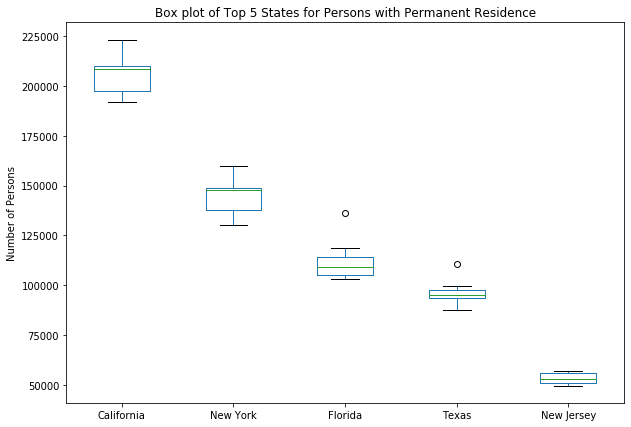

In [122]:
df_top5box.plot(kind='box', figsize=(10, 7))

plt.title('Box plot of Top 5 States for Persons with Permanent Residence')
plt.ylabel('Number of Persons')

plt.show()
